<a href="https://colab.research.google.com/github/jairantunes/Machine-Learning/blob/master/Supervised_learning_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digits identification and classification using MNIST dataset - http://bit.ly/2VY5H7H

## Classify hand written digits 0 through 9

In this exercise we will explore Classification - identifying and then labeling objects in to their classes.
We will be using **Tensorflow** as the framework to do this and exploring **neural networks** and **deep learning!**

### This exercise in ML is like the "Hello World" for programming ! There are other frameworks beside Tensorflow such as mxnet that can be used to solve this. 

For more information check out Tensorflow tutorials https://www.tensorflow.org/tutorials/

The data we will be using comes from MNIST (Modified National Institute of Standards and Technology) dataset that contains images of handwritten digits (by US Censor staff and highschool students) https://en.wikipedia.org/wiki/MNIST_database

An example extract is below


<center><img src="https://raw.githubusercontent.com/elthonf/AITE19/master/pics/mnist_examples.png" alt="Drawing" style="width: 300px;"/></center>

<center><img src="
https://www.tensorflow.org/images/MNIST.png"></center>

In [0]:
# import necessary packages
# In this exercise, tensorflow also has built-in datasets - in this case the MNIST set
import random as rnd
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data as mnist_data
from matplotlib import pyplot as plt


# Read in the data

### Please note that we used the tensorflow built-in functions to import the MNIST data above. 

In [2]:
# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = mnist_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


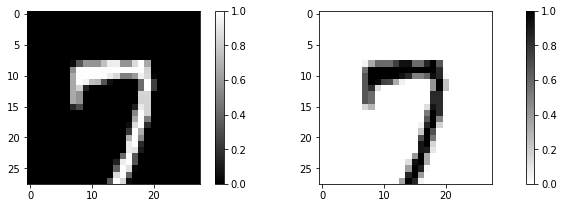

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]  ->  7


In [3]:
# Have a look at a written digit in the MNIST set
myexample = rnd.randrange(0,mnist.train.num_examples)

ex_number = mnist.train.images[myexample]  # change the index here to see different images
ex_number = ex_number.reshape(28, 28)
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(211) 
plt.imshow(ex_number, cmap='gist_yarg')  
ax.set_aspect('equal')
plt.colorbar(orientation='vertical')

ax = fig.add_subplot(221) 
plt.imshow(ex_number, cmap='gray')  
ax.set_aspect('equal')
plt.colorbar(orientation='vertical')

plt.show() 
print (mnist.train.labels[myexample] , " -> " , np.argmax( mnist.train.labels[myexample]) )

In fact, the number you have just seen is coded like this:

In [4]:
ex_number_list = (ex_number.reshape(28 * 28) * 255).astype(int)
ex_text = [b if b != 0 else '' for b in ex_number_list]
pd.DataFrame( np.reshape(ex_text, (28,28)) )

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,,,,,,,,11,87,149,148,148,193,237,238,148,148,219,254,168,,,,,,,,
9,,,,,,,,143,253,254,253,253,253,253,254,253,253,253,253,212,,,,,,,,


# Basic One-Layer NN -- in pictures

<font size = 5> Convert the image into data
<font size = 4> We flatten the image into an 784-dimensional array of greyscale values.

<center>
 <img src="https://raw.githubusercontent.com/elthonf/AITE19/master/pics/mnist-input2.png" alt="Drawing" style="width: 700px;"/>
</center>

<font size = 4> To begin we'll design a 1-layer neural network with 10 output neurons since we want to classify digits into 10 classes (0 to 9).

<center>
<img src="https://raw.githubusercontent.com/elthonf/AITE19/master/pics/full_one_layer_example.png" alt="Drawing" style="width: 800px;"/>
  </center>

<font size = 5> There are a handful of activation functions that are commonly used
* <font size = 4> softmax
* <font size = 4> sigmoid
* <font size = 4> ReLu, leaky ReLU
* <font size = 4> tanh, LeCun's tanh
* <font size = 4> others



<font size = 5> We use the cross entropy to measure the error

### $$ \text{cross entropy} = -\sum Y_i'\log(Y_i) $$


<font size = 3>
Cross entropy - wikipedia - https://en.wikipedia.org/wiki/Cross_entropy 

What is Cross Entropy  ? https://stackoverflow.com/questions/41990250/what-is-cross-entropy

Loss functions - http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html


## Softmax Regressions 

{from Tensorflow tutorials https://www.tensorflow.org/versions/r1.0/get_started/mnist/beginners }


We know that every image in MNIST is of a handwritten digit between zero and nine. So there are only ten possible things that a given image can be. We want to be able to look at an image and give the probabilities for it being each digit. For example, our model might look at a picture of a nine and be 80% sure it's a nine, but give a 5% chance to it being an eight (because of the top loop) and a bit of probability to all the others because it isn't 100% sure.

This is a classic case where a softmax regression is a natural, simple model. If you want to assign probabilities to an object being one of several different things, softmax is the thing to do, because softmax gives us a list of values between 0 and 1 that add up to 1. Even later on, when we train more sophisticated models, the final step will be a layer of softmax.

A softmax regression has two steps: first we add up the evidence of our input being in certain classes, and then we convert that evidence into probabilities.

# Basic One-Layer Neural Network -- at scale

<font size = 4> Rather than run through one example as a time, we'll take advantage of linear algebra and run through batches of 100 at a time. These are called **mini-batches**. One pass through the entire set of training examples is called an **epoch**.

<font size = 4> It is possible to compute your gradient one element (stochastic gradient descent) at a time but using mini-batches is more efficient computationally. 

<center>
<img src="https://raw.githubusercontent.com/elthonf/AITE19/master/pics/one_layer_gif.png" alt="Drawing" style="width: 600px;"/>
  </center>

<font size = 4> And our activation function takes the following form.

<center>
<img src="https://raw.githubusercontent.com/elthonf/AITE19/master/pics/one_layer_output.png" alt="Drawing" style="width: 400px;"/>
  </center>

<font size = 4> The error is computed just as before, using the cross entropy.

<center>
<img src="https://raw.githubusercontent.com/elthonf/AITE19/master/pics/one_layer_crossentropy.png" alt="Drawing" style="width: 600px;"/>
  </center>

### Q. Why work with "mini-batches" of 100 images and labels ?



<font size = 4> It's possible to compute your gradient on just one example image at a time ("stochastic gradient descent"). Doing so on 100 examples gives a gradient that better represents the constraints imposed by different example images and is therefore likely to converge towards the solution faster. 

Can also adjust the size of the mini-batch. There is another, more technical reason: working with batches also means working with larger matrices and these are usually easier to optimise on GPUs.

### Q. Why use cross entropy instead of Mean Square Error ?

<font size = 4> You can use both but average cross entropy is considered better. Loosely, compared to average cross entropy, MSE gives too much weight to incorrect outputs. Also MSE a good measure for Regression models and Cross Entropy is for Classification.

# Basic One-Layer Neural Network -- Code

<font size = 4> Set up place holders (a tensorflow concept) for the computational graph. 

These are parameters that will be filled with actual data from the actual training images.

In [5]:
# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch

X = tf.placeholder(tf.float32, [None, 28, 28, 1])  # see explanation below

# weights W[784, 10]   784=28*28
W = tf.Variable(tf.zeros([784, 10]))  # zeroing the matrix 

# biases b[10]
b = tf.Variable(tf.zeros([10]))  # zeroing the vector

init = tf.global_variables_initializer() # initializing everything !

Instructions for updating:
Colocations handled automatically by placer.


<font size = 4> Note that the shape of the tensor **X** holding the training images is [None, 28, 28, 1]. Here is what those arguments mean:

    'None': this dimension will be the number of images in the mini-batch. It will be known at training time.
    
    '28, 28, 1': our images are 28x28 pixels x 1 value per pixel (grayscale). The last number would be 3 for color images and is not really necessary here.

    

<font size = 4> Note also that we have initialized the weights and biases to be zero. 

In [0]:
# The model
Y = tf.nn.softmax(tf.matmul(tf.reshape(X, [-1, 784]), W) + b)

# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])

<font size = 4> Here the **tf.reshape(X, [-1, 784])** command flattens the image pixels to single array. The model then computes the softmax, given by the formula:

### $$ \textbf{Y} = softmax(\textbf{X}.\textbf{W} + \textbf{b}) $$

<font size = 4> We'll also make a place to hold the correct answers from our labeled data. Recall, that to compute the error of our measurement, we use the cross-entropy. Why this and not the Mean Square Error?

### $$ \text{cross entropy} = -\sum Y_i'\log(Y_i) $$



In [0]:
# loss function in code
cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))

<font size = 4> This takes the log of each element and multiplies the tensors element by element. 

We'll also keep track of the accuracy from our test set of data. 

In [0]:
# % of correct answers found in batch, between 0 (worst) and 1 (best)
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

<font size = 4> **tf.equal** is a boolean that returns the truth value of the actual (Y) and our prediction element-wise (Y_). 

***accuracy*** first casts **is_correct** as a float value type, then computes the mean of elements.

## Optimizing the model using Gradient Descent


Gradient Descent - All you need to know https://hackernoon.com/gradient-descent-aynk-7cbe95a778da 

<font size = 4> Next, we come to the gradient descent part. Here we tell the algorithm how to optimize to minimize the cost. 

You have a choice in selecting an optimizer (there are many available). TensorFlow will compute the partial derivatives of the loss function relatively to all the weights and all the biases. 

The gradient is then used to update the weights and biases. We'll tell the optimizer to use 0.003 as the **learning rate**. Recall, 


<center>
<img src="https://raw.githubusercontent.com/elthonf/AITE19/master/pics/learning_rate1.png" alt="Drawing" style="width: 300px;"/> <img src="https://raw.githubusercontent.com/elthonf/AITE19/master/pics/learning_rate2.png" alt="Drawing" style="width: 300px;"/> 
  </center>

In [0]:
#Select an optimizer and define the training step
optimizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optimizer.minimize(cross_entropy)

### Q. What if the learing rate were smaller? What if the learning rate were larger? 

<center>
<img src="https://raw.githubusercontent.com/elthonf/AITE19/master/pics/learning_rate_DL.png" alt="Drawing" style="width: 550px;"/> 
  </center>

<font size = 4> By now the computational graph structure is complete. Next, we need to feed actual data into the graph and compute something. We start up a **Session** which will keep track of the computational graph and update values of the weights through each mini-batch. 
    
 ### So far we have only 'set up' the Tensorflow compute graph. Now with the "sess.run" call we actually execute the computation

In [0]:
sess = tf.Session()
sess.run(init)

for i in range(1000):
    # load batch of images and correct answers
    batch_X, batch_Y = mnist.train.next_batch(100)
    train_data={X: batch_X, Y_: batch_Y}

    # train
    sess.run(train_step, feed_dict=train_data)

<font size = 4> Once we've run through each mini-batch in our training data, we want to see how good our basic one-layer trained neural network does at identifying hand written digits. We can compute extract the accuracy and cross_entropy from our neural network with the following command. Here we are feeding it the training data. 

In [0]:
# success ?
a_train,c_train = sess.run([accuracy, cross_entropy], feed_dict=train_data)

In [13]:
print ("The accuracy for this model on training data is %.3f." %  a_train)

The accuracy for this model on training data is 0.930.


### Q. Is this a fair assessment of our accuracy and final cross-entropy score?

In [0]:
# success on test data ?
test_data={X: mnist.test.images, Y_: mnist.test.labels}
a_test,c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)

In [15]:
print ("The accuracy for this model on the test data is %.3f." %  a_test)

The accuracy for this model on the test data is 0.917.


### Implemented as a python program! $$\text{mnist_softmax.py}$$

# Adding layers -- in pictures

<font size = 4> Now we'll try to improve our model by adding more layers to our neural network. In pictures, this looks something like this

<center>
<img src="https://raw.githubusercontent.com/elthonf/AITE19/master/pics/five_layers.png" alt="Drawing" style="width: 650px;"/>
  </center>

<font size = 4> There are five layers. 

    The first layer has 200 nodes
    The second layer has 100 nodes
    The third layer has 60 nodes
    The fourth layer has 30 nodes
    The fifth layer has 10 nodes
    
Note also that we use the **sigmoid** function as the activation function in the intermediate layers. And keep **softmax** as the final layer because these are the nodes representing the digits 0 through 9 and softmax does a good job at classification.

<font size = 4> The algorithm will be the same as before 

    Training digits and labels on a mini-batch
    => compute loss function, cross entropy with current weights
    => compute gradient (partial derivatives) of loss w.r.t. weights and biases 
    => move in direction of steepest descent according to learning rate
    => update weights and biases 
    => repeat with next mini-batch of training images and labels
    
Only now to compute our loss function requires these intermediate steps.\\
Another thing to keep in mind is that we should initialize our weights to non-zero values. 

# Adding layers -- in code

<font size = 4> Much of our code will remain the same. We only need to add additional lines for the extra layers

In [0]:
# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])

# five layers and their number of neurons (the last layer has 10 softmax neurons)
L = 200
M = 100
N = 60
O = 30

Next, we'll initialize our weights in each layer randomly by using a truncated normal distribution of values between -0.2 and 0.2.

### Q. Why use a truncated normal?

<font size = 4> It is important to initialise weights with random values to keep the optimizer from getting stuck in its initial position. 

In [0]:
#first layer
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1))  # 784 = 28 * 28
B1 = tf.Variable(tf.zeros([L]))

#second layer using output from first layer 
W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1))
B2 = tf.Variable(tf.zeros([M]))

#third layer using output from second layer
W3 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1))
B3 = tf.Variable(tf.zeros([N]))

#fourth layer using output from third layer
W4 = tf.Variable(tf.truncated_normal([N, O], stddev=0.1))
B4 = tf.Variable(tf.zeros([O]))

#fifth layer using output from fourth layer
W5 = tf.Variable(tf.truncated_normal([O, 10], stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))

<font size = 4> Then, we create our model.

In [0]:
# The model
XX = tf.reshape(X, [-1, 784])                  #XX is X with flattened out the pixels

Y1 = tf.nn.sigmoid(tf.matmul(XX, W1) + B1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2)
Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3) + B3)
Y4 = tf.nn.sigmoid(tf.matmul(Y3, W4) + B4)

<font size = 4> Then, compute the cross entropy, accuracy and set the optimizer.

In [19]:
# loss function in code
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

# compute the error
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_sum(cross_entropy)

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# training step, learning rate = 0.003
#combined the previous two lines into one
train_step = tf.train.GradientDescentOptimizer(0.003).minimize(cross_entropy)

# initialize the Tensorflow session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# train the NN
for i in range(10000):
    # load batch of images and correct answers
    batch_X, batch_Y = mnist.train.next_batch(100)
    train_data={X: batch_X, Y_: batch_Y}

    # train
    sess.run(train_step, feed_dict=train_data)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



<font size = 4> Now let's look at the accuracy.

In [0]:
# success on test data ?
test_data={X: mnist.test.images, Y_: mnist.test.labels}
a_test,c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)

In [21]:
print ("The accuracy for this multi-layer model on the test data is %.3f." %  a_test)

The accuracy for this multi-layer model on the test data is 0.958.


## In conclusion
        *We loaded the MNIST digits dataset and checked it out
        * We tested a single layer neural network and calculated its accuracy
        * We tested a multi layer neural network and showed improvement in accuracy
        * We saw Tensorflow functionality (although briefly)
        
### Some questions you may want to ponder upon:

#### Q: How would changing the number of learning rate affect the accuracy of our NN?
#### Q: How would changing the number of iterations affect the accuracy of our NN?
#### Q: How would changing the number of layers affect the accuracy of our NN?
#### Q: How would changing the number of nodes within a layer affect the accuracy of our NN?
      Q: What's the purpose of life ? :) Who am I ? :)

### $$\text{mnist_fivelayers.py}$$

# Advanced topics follow! 

The topics below will need extra reading so please tread carefully! There is a lot of information on the Net. The Tensorflow tutorials will be a huge help. There are several free resources on Deep Learning. 

The state of the art continues to change so enjoy!


## Tuning a Neural Network

<font size = 4> The deeper a NN gets, the harder it can be for it to converge to the solution. Here are some simple fixes to improve your model.

### ReLU Activation function

<font size = 4> The sigmoid function can be problematic because it squashes values between 0 and 1. This can cause neuron gradients to vanish and slow convergence. Instead of sigmoid we can use ReLU (Rectified Linear Unit)

<center>
<img src="https://raw.githubusercontent.com/elthonf/AITE19/master/pics/relu.png" alt="Drawing" style="width: 300px;"/>
  </center>

<font size = 4> Simply swap **tf.nn.sigmoid** in the code above with **tf.nn.relu**

### Use a differnet optimizer

<font size = 4> In high dimensional spaces with tens of thousands of weights and biases, saddle points can occur which will trap and confuse your optimizer. The saddle points are a problem because the gradient is zero but it isn't because you're at a minimum (or maximum). 

<center>
<img src="https://raw.githubusercontent.com/elthonf/AITE19/master/pics/saddle.png" alt="Drawing" style="width: 300px;"/>
  </center>

<font size = 4> Swap **tf.train.GradientDescentOptimiser** with a **tf.train.AdamOptimizer**

### Try Randomizing Initialisations

<font size = 4> When working with ReLU it is recommended to choose initial weights that are small **and positive**.

### Q: Why do you need to have non-zero values for ReLU?

<font size = 4> So that neurons can operate in the non-zero range of ReLU.

<font size = 4> Try the following code, making all the initial biases 0.1. 

```
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1))  # 784 = 28 * 28
B1 = tf.Variable(tf.ones([L])/10)                            # 0.1 = tf.ones([L])/10

W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1))
B2 = tf.Variable(tf.ones([M])/10)

W3 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1))
B3 = tf.Variable(tf.ones([N])/10)

W4 = tf.Variable(tf.truncated_normal([N, O], stddev=0.1))
B4 = tf.Variable(tf.ones([O])/10)

W5 = tf.Variable(tf.truncated_normal([O, 10], stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))
```

### Learning Rate Decay

<font size = 4> Increasing the number of iterations will improve your accuracy but the results can be noisy and the test accuracy can vary wildly. Try it!

One way to avoid this is to start the learning decay rate fast but then decrease slowly to 0.0001 or smaller. 

Add the following code to add learning rate decay.

```
# learning rate decay
max_learning_rate = 0.003
min_learning_rate = 0.0001
decay_speed = 2000.0 # 0.003-0.0001-2000=>0.9826 done in 5000 iterations
learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)
```

<font size = 4> Try plotting the training and test curves to see the test curve become more stable.

### Regularization in Neural Networks

<font size = 4> A central problem in machine learning is to create a model that performs well on the training set as well as new data. Methods to do this are collectively referred to as **regularization** techniques. There are many regularization techniques in deep learning. A popular one is called **dropout**.

<center>
<img src="https://raw.githubusercontent.com/elthonf/AITE19/master/pics/dropout.png" alt="Drawing" style="width: 500px;"/>
  </center>

<font size = 4>Different neurons will be dropped at each iteration. When testing the performance of your network of course you put all the neurons back (pkeep=1).

<font size = 4> Luckily TensorFlow has a dropout capability built-in. You can adjust the code as follows:

```
# The model, with dropout at each layer
XX = tf.reshape(X, [-1, 28*28])

Y1 = tf.nn.relu(tf.matmul(XX, W1) + B1)
Y1d = tf.nn.dropout(Y1, pkeep)

Y2 = tf.nn.relu(tf.matmul(Y1d, W2) + B2)
Y2d = tf.nn.dropout(Y2, pkeep)

Y3 = tf.nn.relu(tf.matmul(Y2d, W3) + B3)
Y3d = tf.nn.dropout(Y3, pkeep)

Y4 = tf.nn.relu(tf.matmul(Y3d, W4) + B4)
Y4d = tf.nn.dropout(Y4, pkeep)

Ylogits = tf.matmul(Y4d, W5) + B5
Y = tf.nn.softmax(Ylogits)
```

### $$\text{mnist_five_layers_relu_lrdecay_dropout.py}$$

# Convolutional Neural Network

<font size = 4> In a layer of a convolutional network, one "neuron" does a weighted sum of the pixels just above it, across a small region of the image only.

Imagine we have a color picture and the color at a pixel is given by the values of RBG at that pixel. By sliding a 4x4 window across the image we can obtain weighted average of each window.

<center>
<img src="https://raw.githubusercontent.com/elthonf/AITE19/master/pics/con_neural_net.png" alt="Drawing" style="width: 500px;"/>
  </center>

<font size = 4> The TensorFlow syntax for that is 

<center>
<img src="https://raw.githubusercontent.com/elthonf/AITE19/master/pics/cnn_tfsyntax.png" alt="Drawing" style="width: 350px;"/>
  </center>

<font size = 4> Can add as many convolutional layers as you like

<center>
<img src="https://raw.githubusercontent.com/elthonf/AITE19/master/pics/CNN_many_layers.png" alt="Drawing" style="width: 650px;"/>
  </center>
  
  

## Coding a Convolutional Neural Net

<font size = 4> We'll build a convolutional neural net with 3 convolutional layers, a fully connected layer and our original softmax layer. 

We first need to initialize the weights in the weighted averages...

In [0]:
# three convolutional layers with their channel counts, and a
# fully connected layer (tha last layer has 10 softmax neurons)
K = 4  # first convolutional layer output depth
L = 8  # second convolutional layer output depth
M = 12  # third convolutional layer
N = 200  # fully connected layer

W1 = tf.Variable(tf.truncated_normal([5, 5, 1, K], stddev=0.1))  # 5x5 patch, 1 input channel, K output channels
B1 = tf.Variable(tf.ones([K])/10)
W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1))
B2 = tf.Variable(tf.ones([L])/10)
W3 = tf.Variable(tf.truncated_normal([4, 4, L, M], stddev=0.1))
B3 = tf.Variable(tf.ones([M])/10)

W4 = tf.Variable(tf.truncated_normal([7 * 7 * M, N], stddev=0.1))
B4 = tf.Variable(tf.ones([N])/10)
W5 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1))
B5 = tf.Variable(tf.ones([10])/10)

<font size = 4> Next we need to implement the convolutional layers. To do this we can use **tf.nn.conv2d**. We still need to add in the bias then apply the activation function.

```
# first convolutional layer, output is 28x28
stride = 1  
Y1_cnv = tf.nn.conv2d(X, W1, strides=[1, stride, stride, 1], padding='SAME')
Y1 = tf.nn.relu(Y1_cnv + B1)
```

<font size = 4> The padding strategy that works here is to copy pixels from the sides of the image. All digits are on a uniform background so this just extends the background and should not add any unwanted shapes.
'SAME' is the type of padding algorithm to use

Now we code the rest of the layers

```
#second convolutional layer, output is 14x14
stride = 2  
Y2_cnv = tf.nn.conv2d(Y1, W2, strides=[1, stride, stride, 1], padding='SAME') 
Y2 = tf.nn.relu(Y2_cnv + B2)

#third convolutional layer, output is 7x7
stride = 2
Y3_cnv = tf.nn.conv2d(Y2, W3, strides=[1, stride, stride, 1], padding='SAME')
Y3 = tf.nn.relu(Y3_cnv + B3)

# reshape the output from the third convolution for the fully connected layer
YY = tf.reshape(Y3, shape=[-1, 7 * 7 * M])

Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)

Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)
```





### $$\text{mnist_convolutional.py}$$